In [ ]:
# Kaggle'a önceden yüklü olarak gelen python kütüphanelerini aşağıdaki linkten inceleyebilirsiniz:
# https://github.com/kaggle/docker-python

#data analiz kütüphaneleri 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os

#data görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# "../input/" directory'mizdeki data kaynaklarına bakalım. 
# Atölye boyunca birçok farklı dataset'ten yararlanacağız.
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
print(os.listdir("../input/"))

# Coding Summit Machine Learning&NLP atölyesine hoş geldiniz! 
Bugünkü dersimiz boyunca bunun gibi Kernellar üzerinden çalışacağız. İlk dersimizde çeşitli data inceleme, düzenleme, temizleme, görselleştirme ve modelleme teknikleri göreceğiz. Öncelikle bu Kerneli nasıl kopyalayabileceğimize bakalım

## Fork Notebook  
Bu Kernel'a geldiğinizde üstünde herhangi bir değişiklik yapabilmek için öncelikle bir kopyasını oluşturmanız gerekir. Bunun için sağ üst köşede duran "Fork Notebook" tuşuna bastığınızda yeni bir sekmede aynı Kernel'ın bir kopyası oluşacaktır. Bu sayede dersi yaparak da takip edebilirisiniz.
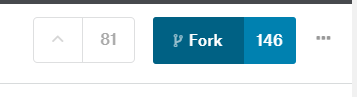

### **Makine öğrenimi nedir?**  
En yaygın olarak kullanılan “makine öğrenimi”, “yapay zeka” ve “derin öğrenme” arasındaki farklara göz atalım.  Az önce de bahsettiğimiz üzere makine öğrenimi yapay zekanın üst başlığıdır. Makine öğrenim adı verilen kavram: bilgisayarların her değeri ve özelliği insan tarafından kodlanmadan verilen veriler ve gerekli ise insan giriş ile, ileride tahmin etme özelliğine sahip bir “hipotez” yaratabilmesidir. Adının verildiği gibi makinaların verilen girdi ile öğrenmesidir yani.  
Bazı örnekler olarak:

* Gmail'in yeni gelen e-postaları spam veya spam değil diye ayırması
* Google, Facebook, Amazon, Spotify gibi büyük şirketlerin sizin aldığınız ürün/baktığınız video/dinlediğiniz şarkılara göre yeni ürün/video/şarkı önermesi
* Yüz tanıma teknolojileri
* Sağlık alanında kullanımlar (örneğin bir kanser kütlesinin kötü huylu olup olmadığına karar vermek)
* Bilgisayarların Go, satranç gibi oyunları oynamayı öğrenmesi  
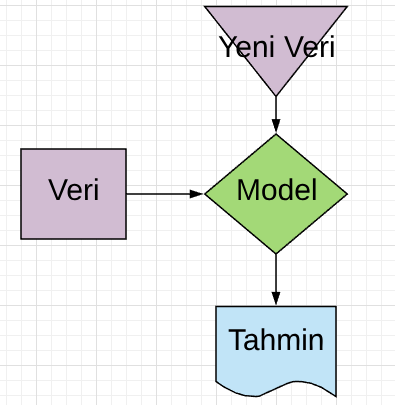


Supervised learning (Denetimli öğrenme): Bu tür algoritmalara çok sayıda eğitim verisi ve bu verinin istenen sonucu verilir. Algoritmalar bu soru-cevap çiftlerini inceleyerek bağlantılar ve trendler bulur. Daha sonradan sonucu verilmeyen veriler, bu önceden belirlenen değerler kullanılarak tahmin yürütülmesi beklenir. Örneğin spam ve spam olmayan mailler bulunduğunu düşünelim. Algoritmamız bu verileri kullanarak sonradan sağlanan verileri spam olup olmadığını anlayabilecektir.

Unsupervised learning (Denetimsiz öğrenme): Bu tür algoritmalara aynı şekilde veri yüklenir, ancak doğru vecap veya istenen bir çıkış yoktur. Bu algoritmalar verinin içindeki benzerlikleri bulur. Bunun örneği olarak Youtube üzerinde benzer türde videolar izleyen insanların gruplanması bu gruba girer.

Öncelikle read_csv() ve describe() fonksiyonlarıyla başlayacağız.
Elimizdeki datasetler csv formatında bulunmakta. Bunları programımızda kullanabilmek için Pandas denilen bir kütüphane kullanacağız. Öncelikle read_csv() komutunun ardından head() veya tail() komutlarını kullanarak data setimizin içindeki değerleri biraz daha iyi anlamaya başlayabiliriz. Bu iki fonskiyona herhangi bir değer vermediğiniz zaman, sırası ile, en üst ve en alt 5 öğreyi size gösterecektir.  
Describe fınksiyonu ise datamızın tüm değerlerini bize göstererek özetler. Normalde yalnızca sayı değerlerini gösterir, ancak include="all" seçeneği ile her sütunu görebilirsiniz.

In [ ]:
pokemonDS = pd.read_csv("../input/pokemon/Pokemon.csv")
pokemonDS.head()

In [ ]:
pokemonDS.describe(include="all")

### **Sıra sizde!**

In [ ]:
# "../input/starbucks-menu/starbucks_drinkMenu_expanded.csv" uzantılı dataset'i okuyup
# starbucks adlı bir değişkende depolayın. sonra head fonksiyonunu kullanarak ilk altı sırasına bakın.

In [ ]:
# describe() metotunu kullanarak starbucks dataset'inin bir özetine bakın.
# tüm sütunları görmek için include"all" demeyi unutmayın!

### Feature (Özellik) Tipleri  
Bir dataset'teki her sütun, verinin belli bir özelliğini temsil eder. Bunlara feature (özellik) denir. Temel olarak iki çeşit özellik vardır: Sayısal ve kategorik.

* **Sayısal özellikler:** Adı üzerinde sayısal değerleri ifade ederler. Bunlar yaş, boy, kilo, uzaklık gibi özellikler olabilir.
* **Devamlı (continuous):** Sayısal özellikler devamlı (continuous) olabilir, yani sonsuz sayıda farklı değer alabilir. Örneğin kilo 64.5 kg, 64.54 kg vs. şeklinde devam edebilir.
* **Ayrık (discrete):** Sayısal özellikle ayrık (discrete) de olabilir. Bu genellikle tam sayılarda görülür. Örneğin bir ailedeki insan sayısı, sadece tam sayı olabilir.
* **Kategorik özellikler:** Genellikle string'ler ile ifade edilen, ve sınırlı bir sayıda farklı değer alabilen özelliklerdir. Örneğin araba modeli, şehir, renk gibi özellikler kategorik özelliklerdir.
* **Ordinal:** Kategorik özelliklerin belli bir sıralaması varsa bunlara ordinal özellikler denilir. Ordinal özelliklere örnek olarak ilkokul-ortaokul-lise üçlemesi verilebilir. Sadece bu üç değerden birini alabilse de belli bir sıralama vardır. 
Üniversiteyle ilgili dataset'imize geri dönerek orada özelliklerin tiplerine bakalım.

In [ ]:
pokemonDS.head()

Gördüğümüz üzere hepsi sayısal özelliktedir. Burda "Research" kategorsinin yalnızca 1 veya 0 aldığını görüyoruz,yani bir nevi kategorik olarak bakabiliriz bu sütuna.

### dtypes metodu  
Bu metodu kullanarak data setimizin içindeki tüm sütunların veri türlerini görmemizi sağlar. Bu sayede datamızı nasıl temizlememiz gerektiğini anlayabiliriz. Eğer datatipimiz object olarak görünseydi (string değerleri "object" olarak gösterilir), o zaman o sütunları düzenlememiz gerekirdi.

In [ ]:
pokemonDS.dtypes

In [ ]:
# starbucks dataset'ine dtypes metotunu uygulayarak data tiplerinin tahminlerinize uygun olup olmadığına bakın!

shape metotu, bir DataFrame'deki sıra ve sütun sayısını verir. Verilen ilk sayı sıra sayısı, ikinci sayı ise sütun sayısıdır. Örneğin  pokemon dataset'inde 800 sıra, 13 sütun vardır.

In [ ]:
pokemonDS.shape

### **Sıra sizede!**  
shape metotunu kullanarak starbucks dataset'inin sıra ve sütun sayısına bakın.

In [ ]:
# starbucks dataset'ine shape metotunu uygulayın

### Columns metodu:  
columns metodu kullanarak data setimizin sütun isimlerini bir liste olarak alabilir, veya isimlerini değiştirebiliriz.

In [ ]:
pokemonDS.columns

In [ ]:
pokemonDS.columns = ['No', 'Name', 'Type1', 'Type 2', 'TotalStats',
       'HP ', 'Atk', 'Def', 'Sp. Atk','Sp. Def', 'Spd', 'Gen', 'Legendary']
pokemonDS.head()

columns metotunu kullanarak starbucks dataset'indeki sütunların adlarına bakın ve bunları aşağıdaki listeyle değiştirin. Tek tek sütunlarla daha kolay çalışabilmek için sütun isimlerini kısaltıyoruz. İsterseniz farklı isimler de koyabilirsiniz, ama unutmamaya dikkat edin!

['beverage_category', 'beverage', 'beverage_prep', 'calories', 'total_fat', 'trans_fat', 'saturated_fat', 'sodium',
'total_carbs', 'cholesterol', 'dietary_fibre', 'sugars', 'proteins', 'vitamin_A', 'vitamin_C', 'calcium', 'iron', 'caffeine']

In [ ]:
# columns metotuyla starbucks dataset'inin sütun isimlerine bakın

### **DataFrame ve Series:**  
Şu ana kadar sürekli olarak DataFrameler üzerinden çalıştık. Bu DataFramelerin hepsi birçok Series'lerden oluşur. DataFrame'in her ssütunu birer Series'dir

DataFrame'in belirli özelliklerini arama  
Bazen bir DataFrame'in sadece bir sütununa, veya bu sütun içindeki belirli bir aralığa bakmak istersiniz. Bunun için "dot notation" (dataframe.ozellik) veya "bracket notation" (dataframe['ozellik'] olarak yazabilirsiniz.

In [ ]:
# dot notation kullanarak cereal dataset'inin calories sütununu alıyoruz
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alıyoruz
pokemonDS.GRE.head(10)

In [ ]:
# bracket notation kullanarak cereal dataset'inin isim sütununu alıyoruz
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alıyoruz
pokemonDS['Name'].head(10)

In [ ]:
# dot notation kullanarak starbucks dataset'inin calories sütununu alın
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alın.

In [ ]:
# bracket notation kullanarak starbucks dataset'inin CGPA sütununu alın
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alın

### Conditional Selection  
Datamızı daha da sınırlandırmak için belirli koşullar koyabiliriz. Mesela Attack'ı 30 dan yüksek pokemonları görmek için aşağıdaki kodu kullanabiliriz.

In [ ]:
# Öğrencilerin sadece CGPA'ın 8'den büyük olduğu sıralarına bakıyoruz
pokemonDS[pokemonDS['Atk'] >= 160]

In [ ]:
# conditional selection ile trans_fat'in >= 1 olduğu sıralara bakın

### 2. Data Görselleştirme  
Şimdiki bölümümüzde ise kullandığımız verilerin görsel çıktılarını almak üzerinde duracağız. Bunu yapabilmek için "Seaborn" adı verilen bir eklenti kullanacağız. Eğer en yukarı çıkıp bakarsanız çoktan bu kütüphaneyi "sns" olarak kernela ekledik. Bu kütüphane sayesinde verimizi kolayca bir sürü grafik haline getirerek kolayca görüntüleyebiliyoruz. O zaman hadi başlayalım!

### Bar Chart  
Bar chart, yani sütun grafiği kategorik verileri görebilmemiz için çok işe yarar. `pokemonDS` data setindeki not durumlarını incelemek için bir grafik yapacağız.

In [ ]:
sns.set_style("darkgrid") # bu satır, seaborn'un kullanacağı stili belirliyor, grafiklerimize çok bir etkisi yok.

In [ ]:
# describe() metotundaki unique sırasını hatırlayın! kaç farklı kategorik özellik olduğunu sayıyordu.
# örneğin, Pokemon dataset'imizde on sekiz farklı pokemon tipi var. 
# countplot, her farklı özelliğin dataset'te kaç kere bulunduğunu göstere bir grafik çizer.
plt.figure(figsize=(16,6))
sns.countplot(x='Type1', data=pokemonDS)
plt.xlabel('Tipler', fontsize=12) # x ekseninin etiketini ve etiketin font büyüklüğünü ayarlıyoruz
plt.ylabel("Pokemon Sayısı", fontsize=12) # y ekseninin etiketini ve etiketin font büyüklüğünü ayarlıyoruz
plt.title('Hangi tipte daha çok Pokemon var?', fontsize=16) # grafiğimizin başlığını koyuyoruz
plt.show() # grafiği gösteriyoruz

### Sıra Sizde!
starbucks dataset'inin beverage_category sütunu için bir countplot yaratın! Acaba Starbucks'ın menüsünde en çok hangi tip içecekler var?

In [ ]:
plt.xticks(rotation=90, fontsize=10) # bu satır, x eksenindeki tüm etiketleri 90 derece döndürüyor ki hepsi okunabilsin.

# seaborn'un barplot fonksiyonunu kullanarak beverage_category ve calories özellikleri için bir barplot çizin!

# x eksenini etiketleyin

# y eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

### Histogram
Sayısal bir özelliğin dağılımını görmek için histogram veya distplot (distribution plot) çizebiliriz. Haydi pPokemon dataset'indeki Tiplerin dağılımına göz atalım.

In [ ]:
AtkVal = pokemonDS['Atk'] # Atk sütununu alıyoruz
plt.hist(AtkVal, bins = 9, edgecolor = "black") # histogramı çiziyoruz
# bins kaç tane aralık olacağını belirliyor. edgecolor'la aralıkların kolay ayırt edilmesi için kenar çizgisi ekliyoruz.
plt.xlabel("Saldırı gücü",fontsize=16) # x eksenine etiket ekliyoruz
plt.title("Saldırı Gücü Dağılımları") # başlık ekliyoruz
plt.show() #grafiği gösteriyoruz

In [ ]:
# total_carbs sütununu carbs adlı bir değişkende depolayın

# matplotlib'in hist fonksiyonunu kullanarak total_carbs sütunu için bir histogram çizin!
# parametre olarak bins = 9 ve edgecolor = 'black' kullanın

# x eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

### Distplot(Distribution Plot)

In [ ]:
sns.distplot(AtkVal) # Saldırı güçleri için distplot çiziyoruz
plt.xlabel("Saldırı Gücü") # x eksenine etiket ekliyoruz
plt.title("Saldırı Gücü Dağılımları")# başlık ekliyoruz
plt.show() # grafiği gösteriyoruz

### Sıra Sizde!

In [ ]:
# seaborn'un distplot fonksiyonunu kullanarak total_carbs sütunu için bir distribution plot çizin!

# x eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

### Scatter Plot  
Bu tür grafikler ile ise iki farklı sayısal değer arasındaki ilişkiyi görebiliriz.

### Sıra Sizde!

In [ ]:
# seaborn'un regplot fonksiyonunu kullanarak cholesterol ve sugars sütunları için bir scatter plot çizin!

# x eksenini etiketleyin

# y eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

In [ ]:
Type_mapping = {"Grass": 1, "Fire": 2, "Water": 3, "Bug": 4, "Poison": 5, "Electric": 6,"Ground": 7, "Fairy": 8, "Fighting": 9, "Psychic": 10, "Rock": 11, "Ghost": 12, "Ice": 13, "Dragon": 14, "Dark": 15, "Steel": 16, "Flying": 17}
NewTypes = pokemonDS
NewTypes["Type1"] = NewTypes["Type1"].map(Type_mapping)
plt.figure(figsize=(16,6))
sns.regplot(x='Type1' ,y='Atk',data=NewTypes, line_kws={'color':'purple'}) # scatter plot'u çiziyoruz
plt.xlabel('Tipler') # x eksenine etiket ekliyoruz
plt.ylabel('Saldırı') # y eksenine etiket ekliyoruz
plt.title('Tip/Saldırı ilişkisi') # başlik ekliyoruz
plt.show() # grafiği gösteriyoruz

### Correlation Heatmap
Correlation heatmap, aynı anda bir dataset'teki tüm sütunların birbirleriyle ilişkilerini görmekte kullanabileceğimiz bir araçtır.

In [ ]:
# bir correlation table görmek için corr() metotunu kullanabiliriz, ancak sonuç kolayca yorumlanamaz
pokemonDS.corr()

In [ ]:
sns.heatmap(pokemonDS.corr())
plt.title('UniversityDataset\'i için Correlation Heatmap', fontsize=14)
plt.show()

### Sıra Sizde!  
`starbucks` dataset'i için bir correlation heatmap çizin!

In [ ]:
# heatmap ve corr fonksiyonlarını kullanarak starbucks dataset'i için bir correlation heatmap çizin

# grafiğin başlığını ekleyin

# grafiği gösterin!
plt.show()

*3. Klasifikasyon*

In [ ]:
from sklearn import datasets
wine = datasets.wine()
wine.feature_names
wineDF = pd.DataFrame(wine.data, columns=wine.feature_names)
wineDF['type'] = wine.target
wineDF.head()

In [ ]:
# seaborn'un heatmap fonksiyonunu kullanarak bir correlation heatmap çiziyoruz
# annot = True parametresiyle correlation değerlerinin heatmap üstünde gösterilmesini sağlıyoruz
sns.heatmap(wineDF.corr(), annot=True)
# grafiğe başlık ekliyoruz
plt.title('Correlation Heatmap for Wine Dataset')
# grafiği gösteriyoruz
plt.show()

In [ ]:
# DecisionTreeClassifier algoritmasını ve accuracy_score fonksiyonunu import ediyoruz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# decisiontree adlı bir değişkende yeni bir DecisionTreeClassifier objesi tanımlıyoruz
decisiontree = DecisionTreeClassifier()

# cancerdf dataframe'inin ilk 50 sırasını test olarak, geriye kalan sıraları ise train olarak tanımlıyoruz
wineTrainX = wineDF.drop("type",axis=1)
wineTrainY = wineDF["type"]
train_X,test_X,train_Y,test_Y = train_test_split(wineTrainX,wineTrainY,test_size = 0.3, random_state=3)

# decisiontree adlı modelimizi x_train, y_train verilerine göre fit ediyoruz
decisiontree.fit(train_X, train_Y)

# decisiontree modeline x_test hakkında tahmin yaptırıp pred değişkeninde saklıyoruz
pred = decisiontree.predict(test_X)

# accuracy_score fonksiyonuyla modelimizin doğruluğunu kontrol ediyoruz
print("accuracy:", accuracy_score(test_Y, pred))